# **Hackathon 2 Team 1 Project - Insurance Market Analysis**

# Section 2: Data Visualization

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the dataset (already clean)
new_df = pd.read_csv("C:\\Users\\jeff .LAPTOP-IGU6VVPB\\Desktop\\Code institute\\vscode-projects\\Hackathon2Team1Project-Health-Insurance-Analysis\\dataset\\processed\\Insurance_cleaned_orig.csv")
new_df.head()

,ID,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(new_df, drop_first=True)

# Split into features and target
X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train baseline Model (Linear Regression)

In [12]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

print("Linear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R²:", r2_score(y_test, y_pred_lin))

Linear Regression Performance:
MAE: 4197.086197745401
RMSE: 5814.366203852963
R²: 0.7822407047860556


Train Advanced Model (Random forest)

In [13]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 2715.330797395896
RMSE: 4640.809594577603
R²: 0.8612734964970404


Feature Importance (Random Forest)

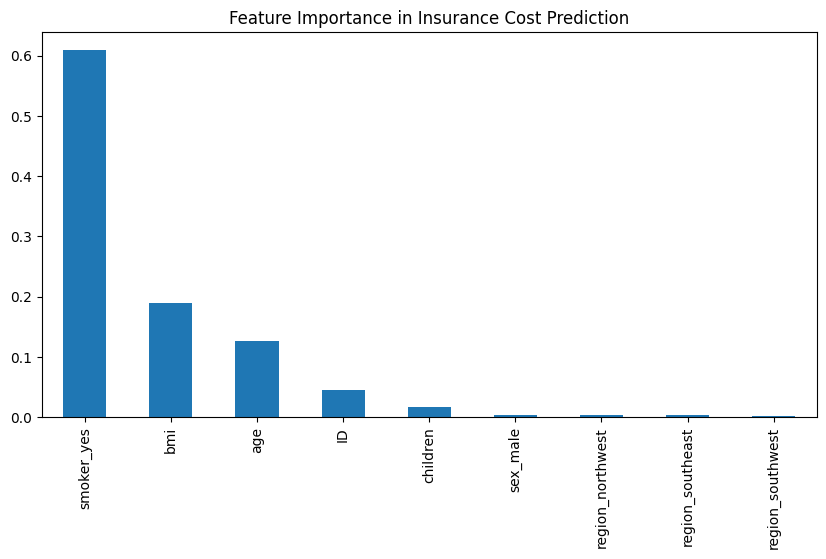

In [14]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))
plt.title("Feature Importance in Insurance Cost Prediction")
plt.show()


Chart of Predicted vs Actual visualization

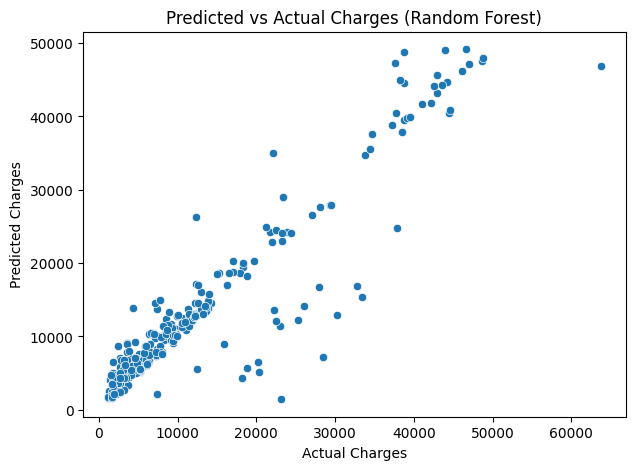

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Predicted vs Actual Charges (Random Forest)")
plt.show()

In [16]:
def predict_insurance_cost(age, sex, bmi, children, smoker, region, model, encoder_columns):
    """
    Predict medical insurance cost for a new individual.
    
    Parameters:
        age (int): Age of the person
        sex (str): "male" or "female"
        bmi (float): Body Mass Index
        children (int): Number of children
        smoker (str): "yes" or "no"
        region (str): "northeast", "northwest", "southeast", or "southwest"
        model: trained ML model (e.g., Random Forest)
        encoder_columns: list of columns from training data (X.columns)
    
    Returns:
        float: Predicted insurance charge
    """
    
    # Build a dictionary for the new data point
    data = {
        "age": [age],
        "bmi": [bmi],
        "children": [children],
        "sex": [sex],
        "smoker": [smoker],
        "region": [region]
    }
    
    # Convert to dataframe
    new_df = pd.DataFrame(data)
    
    # One-hot encode new data
    new_encoded = pd.get_dummies(new_df, drop_first=True)
    
    # Align with training data columns (fill missing with 0)
    new_encoded = new_encoded.reindex(columns=encoder_columns, fill_value=0)
    
    # Predict using trained model
    prediction = model.predict(new_encoded)[0]
    
    return round(prediction, 2)

In [18]:
# Example: Predict for a 35-year-old male, BMI=28.5, 2 kids, smoker, living in southeast
cost = predict_insurance_cost(
    age = int(input("Enter an integer: ")),
    sex = str(input("Enter 'male' or 'female': ")),
    bmi = float(input("Enter a decimal number: ")),
    children = int(input("Enter an integer: ")),
    smoker = str(input("Enter 'yes' or 'no': ")),
    region = str(input("Enter 'southwest' or 'southeast' or 'northwest' or 'northeast': ")),
    model=rf_model,
    encoder_columns=X.columns
)

print("Predicted Insurance Cost: $", cost)


Predicted Insurance Cost: $ 11275.62
